In [1]:
import numpy as np
import pandas as pd
import collections
import nltk
import gensim
from gensim.models import Word2Vec
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
    # Download stopwords and initialize lemmatizer
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

True

In [34]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "This is a sample document for testing the bag of words function.",
    "NLTK provides useful useful tools for text preprocessing.",
    "Bag of words is a simple and effective method for text representation.",
    "Machine learning algorithms often use bag of words as input features."
]


In [18]:
def preprocess_text(documents):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # tokenize documents, remove stop words, and lemmatize
    tokens = []
    for document in documents:
        words = word_tokenize(document.lower())
        filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
        tokens.append(filtered_words)
    return tokens

In [19]:
def bag_of_words_countcoocurence(documents):    
    
    tokens = preprocess_text(documents)
    # create vocabulary
    vocabulary = list(set([word for document in tokens for word in document]))
    print("Vocabulary: ", vocabulary)

    # create BoW vectors
    bow_vectors = []
    for document in tokens:
        bow_vector = np.zeros(len(vocabulary))
        word_counts = Counter(document)
        for i, word in enumerate(vocabulary):
            if word in word_counts:
                bow_vector[i] = word_counts[word]
        bow_vectors.append(bow_vector)

    return pd.DataFrame(bow_vectors, columns=vocabulary)

In [20]:
bag_of_words_countcoocurence(documents)

Vocabulary:  ['fox', 'quick', 'testing', 'machine', 'simple', 'function', 'word', 'dog', 'lazy', 'learning', 'brown', 'sample', 'nltk', 'preprocessing', 'bag', 'jump', 'text', 'tool', 'input', 'feature', 'often', 'provides', 'document', 'effective', 'algorithm', 'representation', 'use', 'useful', 'method']


,fox,quick,testing,machine,simple,function,word,dog,lazy,learning,...,feature,often,provides,document,effective,algorithm,representation,use,useful,method
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
def bag_of_words_normalized(documents):    
    # Preprocess the documents
    tokens = preprocess_text(documents)
    
    # Create vocabulary
    vocabulary = list(set([word for document in tokens for word in document]))
    print("Vocabulary: ", vocabulary)

    # Create BoW vectors with normalized counts
    bow_vectors = []
    for document in tokens:
        bow_vector = np.zeros(len(vocabulary))
        word_counts = Counter(document)
        print("Word Count: ", word_counts)
        total_words = len(document)
        for i, word in enumerate(vocabulary):
            if word in word_counts:
                # Count occurrence
                count_occurrence = word_counts[word]
                # Normalized count occurrence
                normalized_count = count_occurrence / total_words
                bow_vector[i] = normalized_count
        bow_vectors.append(bow_vector)

    # Convert BoW vectors to DataFrame
    return pd.DataFrame(bow_vectors, columns=vocabulary)

In [22]:
bag_of_words_normalized(documents)

Vocabulary:  ['fox', 'quick', 'testing', 'machine', 'simple', 'function', 'word', 'dog', 'lazy', 'learning', 'brown', 'sample', 'nltk', 'preprocessing', 'bag', 'jump', 'text', 'tool', 'input', 'feature', 'often', 'provides', 'document', 'effective', 'algorithm', 'representation', 'use', 'useful', 'method']
Word Count:  Counter({'quick': 1, 'brown': 1, 'fox': 1, 'jump': 1, 'lazy': 1, 'dog': 1})
Word Count:  Counter({'sample': 1, 'document': 1, 'testing': 1, 'bag': 1, 'word': 1, 'function': 1})
Word Count:  Counter({'useful': 2, 'nltk': 1, 'provides': 1, 'tool': 1, 'text': 1, 'preprocessing': 1})
Word Count:  Counter({'bag': 1, 'word': 1, 'simple': 1, 'effective': 1, 'method': 1, 'text': 1, 'representation': 1})
Word Count:  Counter({'machine': 1, 'learning': 1, 'algorithm': 1, 'often': 1, 'use': 1, 'bag': 1, 'word': 1, 'input': 1, 'feature': 1})


,fox,quick,testing,machine,simple,function,word,dog,lazy,learning,...,feature,often,provides,document,effective,algorithm,representation,use,useful,method
0,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.142857
4,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,...,0.111111,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000


In [41]:
def calculate_tf(term_counts, doc_length):
    return term_counts / doc_length

def calculate_idf(documents, term):
    doc_with_term = sum(1 for document in documents if term in document)
    return np.log(len(documents) / (1 + doc_with_term))

def calculate_tfidf(tf_matrix, idf_matrix):
    return tf_matrix * idf_matrix

def tfidf(documents):
    tokens = preprocess_text(documents)
    # create vocabulary
    vocabulary = list(set([word for document in tokens for word in document]))
    print("Vocubaluary:", vocabulary)

    # create TF matrix
    tf_matrix = pd.DataFrame(0, index=range(len(documents)), columns=vocabulary)
    for i, document in enumerate(tokens):
        term_counts = Counter(document)
        doc_length = len(document)
        for term, count in term_counts.items():
            tf_matrix.at[i, term] = calculate_tf(count, doc_length)

    # create IDF matrix
    idf_matrix = pd.Series(0.0, index=vocabulary)
    for term in vocabulary:
        idf_matrix[term] = calculate_idf(tokens, term)

    # calculate TF-IDF matrix
    tfidf_matrix = calculate_tfidf(tf_matrix, idf_matrix)

    return tfidf_matrix

# Example usage
documents = [
    "I love cricket",
    "NlP is an language processing techniques that is made to understand the human languages nauances to computer.",
    "The quick brown fox jump over the lazy dog"
]

tfidf_matrix = tfidf(documents)
print("TF-IDF matrix:")
print(tfidf_matrix)

Vocubaluary: ['quick', 'language', 'love', 'nauances', 'made', 'fox', 'dog', 'processing', 'brown', 'human', 'jump', 'computer', 'understand', 'cricket', 'lazy', 'technique', 'nlp']
TF-IDF matrix:
      quick  language      love  nauances      made       fox       dog  \
0  0.000000  0.000000  0.202733  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.081093  0.000000  0.040547  0.040547  0.000000  0.000000   
2  0.067578  0.000000  0.000000  0.000000  0.000000  0.067578  0.067578   

   processing     brown     human      jump  computer  understand   cricket  \
0    0.000000  0.000000  0.000000  0.000000  0.000000    0.000000  0.202733   
1    0.040547  0.000000  0.040547  0.000000  0.040547    0.040547  0.000000   
2    0.000000  0.067578  0.000000  0.067578  0.000000    0.000000  0.000000   

       lazy  technique       nlp  
0  0.000000   0.000000  0.000000  
1  0.000000   0.040547  0.040547  
2  0.067578   0.000000  0.000000  


C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_12984\4266419785.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tf_matrix.at[i, term] = calculate_tf(count, doc_length)
C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_12984\4266419785.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tf_matrix.at[i, term] = calculate_tf(count, doc_length)
C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_12984\4266419785.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible 

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def bag_of_words(documents):    
    # Preprocess the documents
    tokens = preprocess_text(documents)
    
    # Train Word2Vec model
    model = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)
    
    # Create vocabulary
    vocabulary = list(model.wv.index_to_key)
    print("Vocabulary: ", vocabulary)

    # Create word embeddings for words in the vocabulary
    embeddings = {}
    for word in vocabulary:
        embeddings[word] = model.wv[word]

    # Convert embeddings to DataFrame
    embeddings_df = pd.DataFrame(embeddings.values(), index=embeddings.keys())

    # Reduce dimensionality to 2 dimensions using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_df)

    # Convert reduced embeddings to DataFrame
    embeddings_2d_df = pd.DataFrame(embeddings_2d, index=embeddings.keys(), columns=['PC1', 'PC2'])
    
    return embeddings_2d_df

# Example usage:
# documents = ["This is the first document.", "This document is the second document."]
word_embeddings_2d = bag_of_words(documents)
print(word_embeddings_2d)




Vocabulary:  ['bag', 'word', 'useful', 'text', 'provides', 'brown', 'fox', 'jump', 'lazy', 'dog', 'sample', 'document', 'testing', 'function', 'nltk', 'feature', 'input', 'tool', 'preprocessing', 'simple', 'effective', 'method', 'representation', 'machine', 'learning', 'algorithm', 'often', 'use', 'quick']
                     PC1       PC2
bag             0.019773 -0.014735
word           -0.020471  0.001525
useful         -0.000237 -0.029012
text           -0.019618  0.005359
provides       -0.004291 -0.005396
brown          -0.026061 -0.019600
fox             0.023514  0.001501
jump            0.006352  0.005797
lazy           -0.007237 -0.028638
dog             0.017085 -0.006779
sample         -0.001821  0.009736
document       -0.013479 -0.013427
testing         0.002296  0.005785
function       -0.006998  0.023609
nltk           -0.007787  0.020220
feature        -0.007074 -0.011311
input           0.024154 -0.010918
tool           -0.029507  0.010258
preprocessing  -0.002682 -0

In [37]:
def plot_embeddings(embeddings_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_df['PC1'], embeddings_df['PC2'], color='b')

    # Add labels to each point
    for word, (x, y) in embeddings_df.iterrows():
        plt.annotate(word, (x, y), fontsize=8)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D Word Embeddings')
    plt.grid(True)
    plt.show()

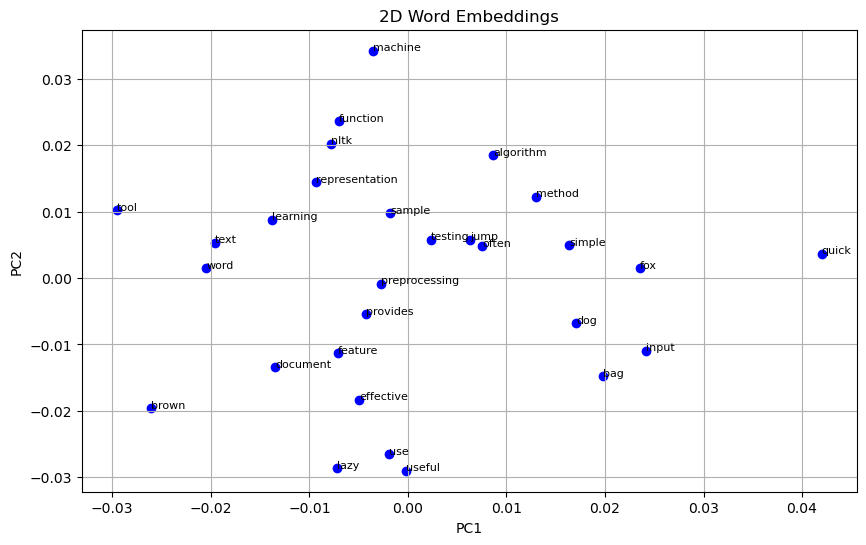

In [38]:
plot_embeddings(word_embeddings_2d)